# Concrete Compressive Strength.

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

Here is your Required [Data ](https://drive.google.com/open?id=1Csmy8fz4BDM70wD07XJYKPqOr8BAPfzE)
###### **Good Luck**


### Contents
###### 1. Importing Packages
###### 2. Data preprocessing and preliminary visualizing
        2.1.  Read data
        2.2.  checking data type
        2.3.  checking for missing values¶
        2.4.  changing data frame to a numpy array
        2.5.  Plotting each feature againist the label
        2.6.  Features importance
        2.7.  Correlation matrix
        2.8.  checking for multicollinearity (by VIF)
        2.9.  Separate X from y¶
        2.10. Separation to Train and Test
###### 3. Regression analysis
        3.1.  OLS
        3.2.  GLS
        3.3.  SKlearn.LinearRegression
        3.4.  Mariamz_poly_lasso_LR
        3.5.  Adaptive boosting Algorithm
        3.6.  Gradient Boosting Algorithm
        3.7.  Extreme Gradient Boosting Algorithm
###### 4. Summary


# 1- Importing packages

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm  # OLS and GLS
import xgboost as xgb #pip install xgboost



# 2- Data preprocessing and preliminary visualizing 

### 2.1. Read  data

In [26]:
df=pd.read_excel('Concrete_Data.xls')
#df.head()


### 2.2. checking data type


In [27]:
a=[]
for i in range(df.shape[1]):
    a.append(df.iloc[:,i].dtype)
a



[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64')]

### 2.3. checking for missing values

In [28]:
a=[]
for i in range(df.shape[1]):
    a.append(df.iloc[:,i].isnull().values.any())
a




[False, False, False, False, False, False, False, False, False]

### 2.4. changing data frame to a numpy array

In [29]:
D=np.array(df)

### 2.5. Plotting each feature against label

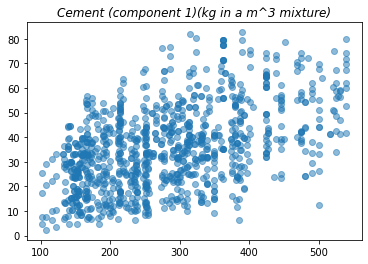

------------


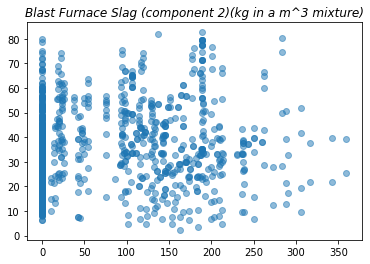

------------


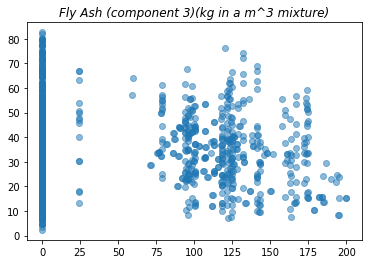

------------


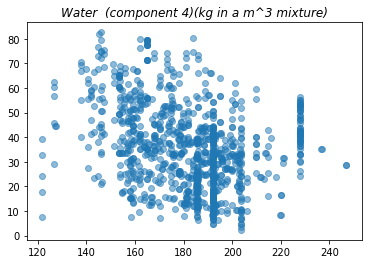

------------


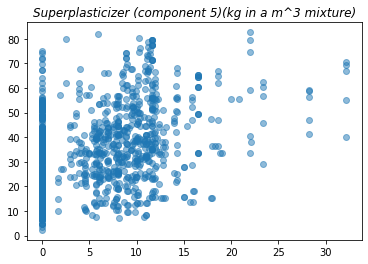

------------


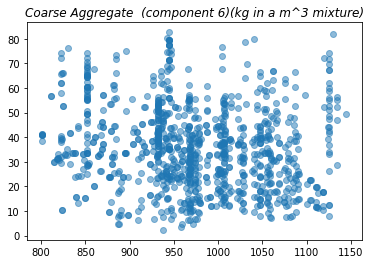

------------


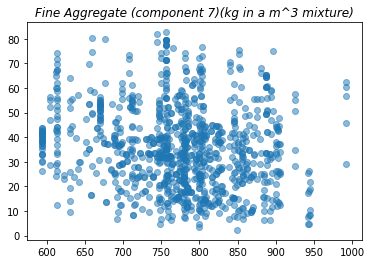

------------


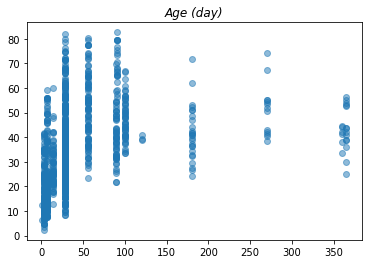

------------


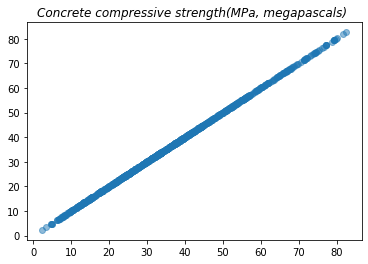

------------


In [30]:
for i in range(D.shape[1]):
    plt.title(df.columns[i],fontsize=12,fontstyle='italic')
    plt.scatter((D[:,i]),(D[:,-1]), alpha=0.5,label='Y')
    plt.show()
    print("------------")

### 2.6. Features importance

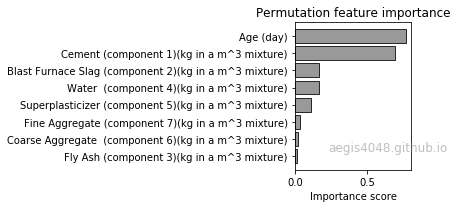

In [31]:
df_X=df.iloc[:,0:-1]
df_y=df.iloc[:,-1]
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
#conda install -c conda-forge rfpimp
import rfpimp
rf.fit(df_X, df_y)

imp = rfpimp.importances(rf, df_X, df_y)
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()


### 2.7. Correlation matrix (checking for multicollinearity)

In [32]:
import matplotlib.pyplot as plt
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1,-0.275193,-0.397475,-0.0815436,0.0927714,-0.109356,-0.22272,0.0819473,0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275193,1,-0.323569,0.107286,0.0433757,-0.283998,-0.281593,-0.0442458,0.134824
Fly Ash (component 3)(kg in a m^3 mixture),-0.397475,-0.323569,1,-0.257044,0.37734,-0.00997679,0.0790764,-0.15437,-0.105753
Water (component 4)(kg in a m^3 mixture),-0.0815436,0.107286,-0.257044,1,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer (component 5)(kg in a m^3 mixture),0.0927714,0.0433757,0.37734,-0.657464,1,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109356,-0.283998,-0.00997679,-0.182312,-0.266303,1,-0.178506,-0.00301551,-0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.22272,-0.281593,0.0790764,-0.450635,0.222501,-0.178506,1,-0.156094,-0.167249
Age (day),0.0819473,-0.0442458,-0.15437,0.277604,-0.192717,-0.00301551,-0.156094,1,0.328877
"Concrete compressive strength(MPa, megapascals)",0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1


### 2.8. checking for multicollinearity (by VIF)

In [34]:
X_df=df.iloc[:,0:-1]
cc = np.corrcoef(X_df, rowvar=False)
VIF = np.linalg.inv(cc)
VIF.diagonal()

array([7.4886572 , 7.27652859, 6.17145475, 7.00466315, 2.96529717,
       5.07604373, 7.00534557, 1.1183569 ])

### 2.9. Separate X from y

In [35]:
X=D[:,0:-1]
y=D[:,-1]
y=y.reshape(-1,1)

### 2.10. Separation to Train and Test

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1,shuffle=True)
np.shape(X_train)

(721, 8)

# 3. Regression Analysis

### 3.1. Analysis using OLS 

In [37]:
import statsmodels.api as sm
model_ols_train=sm.OLS(y_train,X_train).fit()
pred_train_ols=model_ols_train.predict(X_train)
pred_test_ols=model_ols_train.predict(X_test)
from sklearn.metrics import r2_score
Er_train=r2_score(y_test,pred_test_ols)
#print ("r2 of train = {}".format(Er_train))
Er_test=r2_score(y_train,pred_train_ols)
print ("r2 of test = {}".format(Er_test))


r2 of test = 0.6313302963843906


### 3.2. Analysis using GLS

In [38]:
import statsmodels.api as sm
ols_resid = model_ols_train.resid
res_fit = sm.OLS(list(ols_resid[1:]), list(ols_resid[:-1])).fit()
rho = res_fit.params
from scipy.linalg import toeplitz
order = toeplitz(np.arange(721))
sigma = rho**order
gls_model = sm.GLS(y_train, X_train, sigma=sigma)
gls_results = gls_model.fit()
#print(gls_results.summary())
gls_pred=gls_results.predict(X_train)
from sklearn.metrics import r2_score
Er_gls=r2_score(y_train,gls_pred)
print ("r2 of gls = {}".format(Er_gls))



r2 of gls = 0.6312785932817032


### 3.3.  using SKlearn.LinearRegression

In [40]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
y_hat=LR.predict(X_test)
r2_score(y_test,y_hat)

0.5683687007138152

### 3.4. using Mariamz_poly_lasso_LR

In [41]:
def Mariamz_poly_lasso_LR(data_frame,random_state,max_degree_of_polynomial,range_of_alpha,resolution_of_lasso_iteration):
    #RS=random state of train test splitting
    #D= degree of polynomial
    #res=resolution of lasso
    import  numpy as np
    import  pandas as pd
    import  sklearn 
    import matplotlib.pyplot as plt
    from  sklearn.model_selection  import train_test_split 
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score
    from sklearn.linear_model import Lasso
    from sklearn.linear_model import LinearRegression
    
    X= data_frame.iloc[:,0:data_frame.shape[1]-1].values
    y= data_frame.iloc[:,data_frame.shape[1]-1].values 
    if data_frame.shape[1]==2:
        X= X.reshape(-1,1)   # RESHAPED
        y=y.reshape(-1,1)

    
    
    
    #R2_train=[]
    R2_test=[]
    Deg=[]
    Alpha=[]
    R2_test_lasso=[]
    final_degree=[]
    final_alpha=[]
    
    X_train,X_test,y_train , y_test =  train_test_split(X,y,test_size=0.3, random_state=random_state,shuffle=True)
    
    for i in range(max_degree_of_polynomial):
        PL= PolynomialFeatures(degree=i)
        Deg.append(i)
        p_X_train=PL.fit_transform(X_train)
        p_X_test=PL.fit_transform(X_test)
        LR=LinearRegression()
        LR_fit=LR.fit(p_X_train,y_train)
        LR_pred_train=LR_fit.predict(p_X_train)
        LR_pred_test=LR_fit.predict(p_X_test)
        r2_train=r2_score(y_train,LR_pred_train)
        r2_test=r2_score(y_test,LR_pred_test)
        #R2_train.append(r2_train)
        R2_test.append(r2_test)
    for d,r in zip(Deg,R2_test):
        if r==max(R2_test):
            final_degree.append(d)
    
    PL_d= PolynomialFeatures(degree=d)
    p_X_train_d=PL_d.fit_transform(X_train)
    p_X_test_d=PL_d.fit_transform(X_test)
    
    for alpha in np.arange(0,range_of_alpha,resolution_of_lasso_iteration):
        lasso = Lasso(alpha = alpha, normalize=True)
        Alpha.append(alpha)  
        lso_fit=lasso.fit(p_X_train_d, y_train)
        lso_pred_test=lso_fit.predict(p_X_test_d)
        r2_test_lasso=r2_score(y_test,lso_pred_test)
        R2_test_lasso.append(r2_test_lasso)
    for a,r in zip(Alpha,R2_test_lasso):
        if r==max(R2_test_lasso):
            final_alpha.append(a)
    #return final_degree[0], final_alpha[0]
    lasso_final=Lasso(alpha=final_alpha[0],normalize=True)
    lasso_final_fit=lasso_final.fit(p_X_train_d, y_train)
    lasso_final_predict=lasso_final_fit.predict(p_X_test_d)
    lasso_final_predict_r2=r2_score(y_test,lasso_final_predict)
   
    return final_degree[0], final_alpha[0],lasso_final_predict_r2
   
A,B,C=Mariamz_poly_lasso_LR(df,1,5,40,.1)
C    
    

D:\Users\Maryoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Users\Maryoma\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Users\Maryoma\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7986.579312074951, tolerance: 20.332941541912323
  positive)
D:\Users\Maryoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Users\Maryoma\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regula

0.8805264077380601

### 3.5. using Adaptive boosting algorithm

In [42]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)


D:\Users\Maryoma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7956068762065319

### 3.6 using Gradient Boosting Algorithm

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

D:\Users\Maryoma\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9186360944872757

### 3.7. Using Extreme Gradient Boosting Algorithm

In [46]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9471925195624118

# 4.Summary

In [50]:
a=["OLS","GLS","SK-LR","Mariamz","Adaptive boosting","Gradient Boosting","xgboost"]
b=[0.6313,0.6312,0.5683,0.8805,0.7956,0.9186,0.9472]
df_summary = pd.DataFrame(list(zip(a, b)), 
               columns =['Method', 'R2']) 
df_summary 

,Method,R2
0,OLS,0.6313
1,GLS,0.6312
2,SK-LR,0.5683
3,Mariamz,0.8805
4,Adaptive boosting,0.7956
5,Gradient Boosting,0.9186
6,xgboost,0.9472
